# Understanding Descriptive Statistics

Import the necessary libraries here:

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
import scipy.stats
from statsmodels.stats.weightstats import ztest
from random import randint
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [11]:
def dice(x):
    rolls = []
    for i in range(10):
        two_dice = random.randint(1, 6)
        rolls.append(two_dice)
    return rolls

In [12]:
x = dice(5)

In [29]:
df = pd.DataFrame(x)
df0 = df.rename({0:'value'}, axis = 1)
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


#### 2.- Plot the results sorted by value.

In [40]:
df1 = df0.sort_values(by= ['value']).reset_index(drop = True)
df1

,value
0,1
1,1
2,2
3,3
4,4
5,5
6,6
7,6
8,6
9,6


<AxesSubplot:xlabel='value', ylabel='count'>

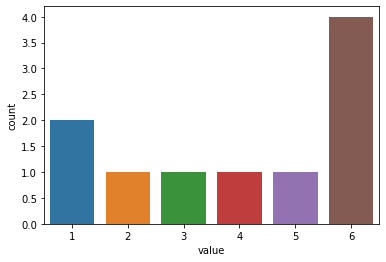

In [71]:
sns.countplot(x ="value", data = df1)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [64]:

df1['freq_count'] = df1.groupby('value')['value'].transform('count')
df2 = df1.groupby(['value']).count()
df3 = df2.reset_index()
df3

,value,freq_count
0,1,2
1,2,1
2,3,1
3,4,1
4,5,1
5,6,4


<AxesSubplot:xlabel='freq_count', ylabel='count'>

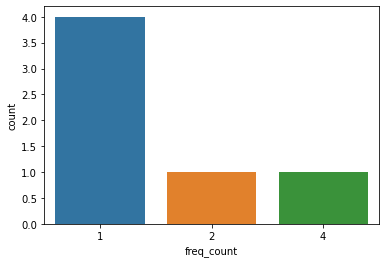

In [70]:
sns.countplot(x ="freq_count", data = df2)

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [91]:
def mean(list_1):
    avg = sum(list_1) / len(list_1)
    return avg

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [93]:
df4 = df3['freq_count']
mean_2 = list(df4)

In [94]:
mean(mean_2)

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [95]:
def median (x):
    x.sort()
    if len(x)%2 != 0:
        median = x[int(len(x)/2)]
    else: 
        median = x[(int(len(x)/2))-1]+ x[int(len(x)/2)]
    return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [98]:
df_roll = pd.read_csv('/Users/anadeondarza/Desktop/ironhack_data/dataptmad0522_labs/module-2/understanding-descriptive-stats/data/roll_undred.csv')
df_roll_1 = df_roll.sort_values(by= ['value']).reset_index(drop = True)
df_roll_1

,Unnamed: 0,roll,value
0,0,0,1
1,47,47,1
2,56,56,1
3,9,9,1
4,73,73,1
...,...,...,...
95,17,17,6
96,11,11,6
97,24,24,6
98,21,21,6


<AxesSubplot:xlabel='value', ylabel='count'>

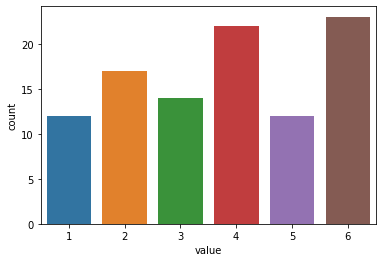

In [99]:
sns.countplot(x ="value", data = df_roll_1)

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [102]:
df_roll_2 = df_roll_1['value']
mean_roll = list(df_roll_2)
mean(mean_roll)

3.74

#### 3.- Now, calculate the frequency distribution.


In [114]:

df_roll_1['freq_count'] = df_roll_1.groupby('value')['value'].transform('count')
df_roll_3 = df_roll_1.groupby(['value']).count()
df_roll_4 = df_roll_3.reset_index()
df_rool_f = df_roll_4.drop('Unnamed: 0', axis =1)
df_rool_f1 = df_rool_f.drop('roll', axis =1)
df_rool_f1

,value,freq_count
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([3., 0., 1., 0., 2.]),
 array([12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 5 artists>)

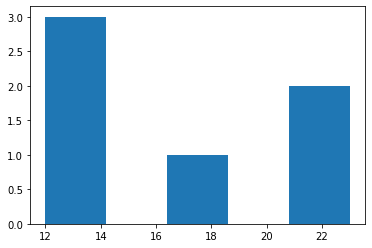

In [117]:
df_h = df_rool_f1['freq_count']
plt.hist(df_h, bins =5)

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""